## A Few More Handy Pandas Ditties

##### Imports

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division
import numpy as np
import pandas as pd
%matplotlib inline

##### Read in some Weather Data

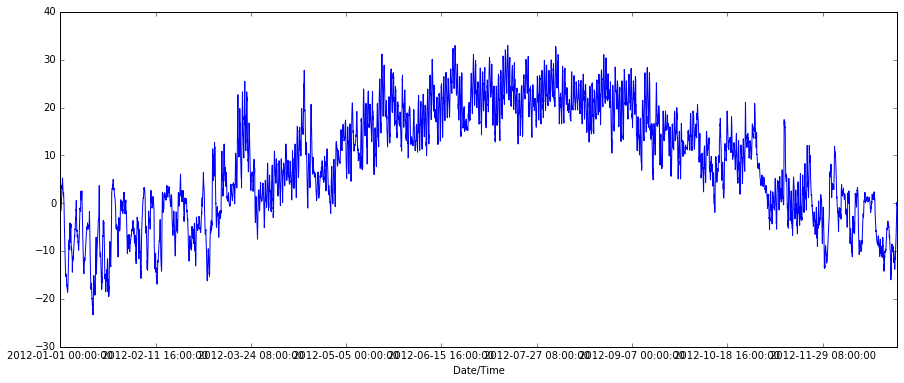

In [3]:
# Read it in, set the Date/Time as the index
# (we're going to build a time series!)
weather = pd.read_csv('day04_data/weather.csv', index_col='Date/Time')
# first colname = 'Date/Time' is being used as the index
# Take a look (univariate time series plot of var 'Temp(C)')
weather['Temp (C)'].plot(figsize=(15, 6))

In [4]:
# Examine the columns
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


In [6]:
# Examine some of the values
# note that Date/Time is now the index
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Applying Functions Across `Series` or `Dataframe`
Often times we'll want to update a series or Dataframe by applying functions to all of the values in a column or columns.  There are 3 main functions for doing this: `map()`, `apply()`, and `applymap()`.

**`map()`**  
Run a function on every element in a **`Series`**.  For instance, let's try converting temperature to Fahrenheit and adding that column:

In [7]:
# Function that converts Celsius to Fahrenheit
def celsius_to_fahrenheit(temp):
    return (9.0*temp/5.0) + 32

# Use it to make the conversion and add a new column for it
# map() is a method on a Series (df col)
# Series.map(function)
weather['Temp (F)'] = weather['Temp (C)'].map(celsius_to_fahrenheit) # creates a new col
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F)
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


##### Lambda Functions
Often we won't want to explicitly write out the function definition for something like this because we'll just use it once and never again.  This is where "throwaway" or "temp" functions come in with the `lambda` operator.  Here's how you would do the same task with a `lambda`:

In [8]:
# lambda input: output (x is just an iterator - you can name it anything)
weather['Temp (F)'] = weather['Temp (C)'].map(lambda x: 9.0*x/5.0 + 32)
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F)
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


**`apply()`**  
This is for functions that operate on entire arrays (`Series`) within a `Dataframe`.  Examples would include your usual aggregation functions like `sum()`, `mean()`, etc.  Here for example is how we might use it to find the range for each numeric column:

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 8 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
Temp (F)              8784 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 617.6+ KB


In [11]:
# apply works on each Series as a whole within a dataframe
# Select only temperature columns and find their range
# `lambda input: input.max() - inputmin.max()` <-- this gets the range
# this gives you one (scalar) output per column
weather_temps = weather[['Temp (C)', 'Temp (F)']] # new df with just 2 cols
weather_temps.apply(lambda x: x.max() - x.min())

Temp (C)     56.30
Temp (F)    101.34
dtype: float64

**`applymap`**  
This does element-wise operations on everything in a **`Dataframe`**:

In [12]:
# Function to format numerics
format = lambda x: '%.2f' % x # 2 decimal float
weather_temps.applymap(format)
# does to every single element in the whole df

,Temp (C),Temp (F)
Date/Time,,
2012-01-01 00:00:00,-1.80,28.76
2012-01-01 01:00:00,-1.80,28.76
2012-01-01 02:00:00,-1.80,28.76
2012-01-01 03:00:00,-1.50,29.30
2012-01-01 04:00:00,-1.50,29.30
2012-01-01 05:00:00,-1.40,29.48
2012-01-01 06:00:00,-1.50,29.30
2012-01-01 07:00:00,-1.40,29.48
2012-01-01 08:00:00,-1.40,29.48


#### String Operators
`map`, `apply`, and `applymap` are general and allow you to write just about any function to apply to elements in dataframes.  However, `pandas` has a bunch of its own built-in functions for these things, especially when working with strings.

The `Weather` column is our only string here, so let's use it to look at some string operators.  First let's check out the unique values in there:

In [13]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F)
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


In [14]:
weather.Weather.unique() # unique levels

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
       

**`replace()`**  
Just to demonstrate, let's replace all of the occurrences of "Fog" with " Fog":

In [15]:
# df.col is just a single column of Series
# .str turns elem in Series into strings
# .replace(oldvalue, newvalue) is a essentially 
spacey_fog = weather.Weather.str.replace('^Fog', ' Fog') 
# replaces anything that begins with 'Fog...' with ' Fog' (extra space)
spacey_fog.unique()

array([' Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
      

**`strip()`**  
Now let's undo our work with `strip()` to remove leading/trailing whitespace:

In [30]:
spacey_fog.str.strip().unique() # removed whitespace in 'Fog'

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
       

**`contains()`**  
Let's use this method to check if the Weather contains "Snow" and if it does store that is `is_snowing`:

In [16]:
is_snowing = weather.Weather.str.contains('Snow') # new boolean Series or mask
type(is_snowing)

pandas.core.series.Series

In [17]:
weather[is_snowing] # df[mask] to subset df
# weather[is_snowing != True] # quick way for not snowing

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F)
Date/Time,,,,,,,,
2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,28.22
2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,21.92
2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,21.56
2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,18.68
2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,15.80
2012-01-03 02:00:00,-10.5,-15.8,65,22,12.9,100.53,Snow Showers,13.10
2012-01-03 03:00:00,-11.3,-18.7,54,33,25.0,100.61,Snow Showers,11.66
2012-01-03 05:00:00,-12.9,-19.1,60,22,25.0,100.76,Snow Showers,8.78
2012-01-03 06:00:00,-13.3,-19.3,61,19,25.0,100.85,Snow Showers,8.06


### Time Series  
As you're probably well aware by now, `pandas` can be indexed by datetimes without batting an eye.  Effectively, this means it handles **Time Series Data** out of the box!

Here are a few nice methods for working with time series, we'll expand on these when we discuss time series explicitly later in the course.

**`date_range()`**  
Creates a `DateTimeIndex` which can index a time series.  This is especially useful if you don't already have one or want to make changes to one:

In [36]:
# Example date range with frequency specifier every 3 days, starting january 1st, for 6 cycles
# date_range is just a pd function, not specifically a df or Series method
# normally, pd.date_range('start', 'end', ...)
dates = pd.date_range('20130101', periods=6, freq='3D') 
# freq is frequency, here '3D' is every 3 days
dates # this is a DatetimeIndex which needs to be applied as an index to a df

DatetimeIndex(['2013-01-01', '2013-01-04', '2013-01-07', '2013-01-10',
               '2013-01-13', '2013-01-16'],
              dtype='datetime64[ns]', freq='3D')

In [38]:
# Create a random dataframe with the 'dates' DatetimeIndex
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df # note that end range (6) is included

,A,B,C,D
2013-01-01,1.210681,-0.592844,0.556360,-0.163753
2013-01-04,-1.094340,0.286445,0.290080,0.413413
2013-01-07,0.285708,-1.097062,-0.058526,0.835910
2013-01-10,1.521285,0.808833,0.171357,-1.186117
2013-01-13,0.509437,-0.390003,-0.565346,-0.302044
2013-01-16,0.112743,-0.440471,-1.101404,-3.190187


**`resample()`**  
Every datetime index has an inherent frequency.  For instance, in the example above the frequency was every 3 days.  The `resample()` method is so valuable in that it allows us to either **upsample** or **downsample** to change the frequency of the observations.  Upsampling involved getting more frequent observations--obviously this is limited by the total number that you have--but you can also potentially **interpolate** values for these new observations and `pandas` has methods for doing this.  In downsampling, you're simple reducing the observations down to the appropriate frequency.

Let's use resampling along with our `is_snowing` variable to determine the snowiest **month** (as opposed to the current data by day)!  When downsampling like this, you can specify parameters as to how to aggregate the observations being dropped.  Here we'll use the **mean**:

In [ ]:
# upsampling is increasing frequency
# downsampling can be every 24 hours (so effectively everyday)
# can use average, median, sum of 24 points
# if Series is cumulative, can keep last entry, for instance

In [18]:
weather.index # check index or row labels (len = 8784)

Index(['2012-01-01 00:00:00', '2012-01-01 01:00:00', '2012-01-01 02:00:00',
       '2012-01-01 03:00:00', '2012-01-01 04:00:00', '2012-01-01 05:00:00',
       '2012-01-01 06:00:00', '2012-01-01 07:00:00', '2012-01-01 08:00:00',
       '2012-01-01 09:00:00',
       ...
       '2012-12-31 14:00:00', '2012-12-31 15:00:00', '2012-12-31 16:00:00',
       '2012-12-31 17:00:00', '2012-12-31 18:00:00', '2012-12-31 19:00:00',
       '2012-12-31 20:00:00', '2012-12-31 21:00:00', '2012-12-31 22:00:00',
       '2012-12-31 23:00:00'],
      dtype='object', name='Date/Time', length=8784)

In [19]:
weather.index = pd.date_range('20120101', periods = 8784, freq = 'H')
weather.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8784, freq='H')

In [20]:
is_snowing = weather.Weather.str.contains('Snow')
is_snowing.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8784, freq='H')

In [ ]:
# What's happening here?
# - downsampling from hourly to monthly
# - take average of is_snowing (bool)
# which we cast as floats (0 and 1)
# too average by month
# - this effectively gives the percentage of each month that it is snowing

In [21]:
is_snowing.head()

2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Freq: H, Name: Weather, dtype: bool

In [22]:
is_snowing.astype(float).head()

2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
Freq: H, Name: Weather, dtype: float64

In [54]:
# this gives the proportion of hours in a month that is snowing
# - average of 0s and 1s will give you the percentage of 1s (True)
is_snowing.astype(float).resample('M', how=np.mean)

/Users/rol-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

In [24]:
is_snowing.astype(float).resample('M').mean() # new syntax

2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

In [25]:
# This gives the proportion of every *day* that is snowing
is_snowing.astype(float).resample('D', how=np.mean).head()

/Users/rol-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


2012-01-01    0.000000
2012-01-02    0.166667
2012-01-03    0.250000
2012-01-04    0.458333
2012-01-05    0.375000
Freq: D, Name: Weather, dtype: float64

In [26]:
is_snowing.astype(float).resample('D').mean().head() # new syntax

2012-01-01    0.000000
2012-01-02    0.166667
2012-01-03    0.250000
2012-01-04    0.458333
2012-01-05    0.375000
Freq: D, Name: Weather, dtype: float64

### Joining Related Datasets

**`merge()`**  
What if now we wanted to join together our `is_snowing` with the columns from `weather` so they're all alligned in the same Dataframe.  This is literally called a **join** in classical SQL (database query language) terms, and `pandas` has a few ways to accomplish it.  `merge` is the best, so let's start there:

In [29]:
# What's happening?
# 'weather' is the left (original) df (eveything before Weather_y)
# and pd.DataFrame(is_snowing) is the newly created right df
# (created from is_snowing, which is a boolean Series of True,False)
weather_snowing = weather.merge(pd.DataFrame(is_snowing), left_index=True, right_index=True)
weather_snowing.head() # this is a new df

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather_x,Temp (F),Weather_y
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,False
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,False
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,False
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,False
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,False


**`join()`**  
This is slightly different than `merge`, we prefer `merge`:

In [30]:
weather.join(is_snowing, how="inner", rsuffix='2')

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),Weather2
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,False
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,False
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,False
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,False
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,False
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,29.48,False
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,29.30,False
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,29.48,False
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,29.48,False
2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog,29.66,False


**`concat()`**  
This concatenates 2 dataframes vertically, aka adds a bunch of rows to a bunch of other rows:

In [31]:
weather_concat = pd.concat([weather.iloc[0:100,], weather.iloc[200:300,]])
weather_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2012-01-01 00:00:00 to 2012-01-13 11:00:00
Data columns (total 8 columns):
Temp (C)              200 non-null float64
Dew Point Temp (C)    200 non-null float64
Rel Hum (%)           200 non-null int64
Wind Spd (km/h)       200 non-null int64
Visibility (km)       200 non-null float64
Stn Press (kPa)       200 non-null float64
Weather               200 non-null object
Temp (F)              200 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.1+ KB


**`append()`**  
Add a single row to a DataFrame:

In [32]:
weather_append = weather_concat.append(weather.iloc[305,])
weather_append.info() # count increased by 1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2012-01-01 00:00:00 to 2012-01-13 17:00:00
Data columns (total 8 columns):
Temp (C)              201 non-null float64
Dew Point Temp (C)    201 non-null float64
Rel Hum (%)           201 non-null int64
Wind Spd (km/h)       201 non-null int64
Visibility (km)       201 non-null float64
Stn Press (kPa)       201 non-null float64
Weather               201 non-null object
Temp (F)              201 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.1+ KB


### Summarizing Data

**`corr()`**  
This function is really useful as it calculates pairwise **correlations** between all of the variables in your data table:

In [64]:
weather.corr() # pairwise correlation

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Temp (F)
Temp (C),1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389,1.000000
Dew Point Temp (C),0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616,0.932714
Rel Hum (%),-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424,-0.220182
Wind Spd (km/h),-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613,-0.061876
Visibility (km),0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847,0.273455
Stn Press (kPa),-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000,-0.236389
Temp (F),1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389,1.000000


**`cov()`**  
Similarly, here is **covariance**:

In [65]:
weather.cov()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Temp (F)
Temp (C),136.606604,118.641308,-43.540073,-6.283660,40.343485,-2.331894,245.891887
Dew Point Temp (C),118.641308,118.441263,25.684917,-9.047958,6.980371,-2.944971,213.554355
Rel Hum (%),-43.540073,25.684917,286.248550,-13.633521,-135.330500,-3.304649,-78.372132
Wind Spd (km/h),-6.283660,-9.047958,-13.633521,75.493440,0.535508,-2.615151,-11.310589
Visibility (km),40.343485,6.980371,-135.330500,0.535508,159.332259,2.470011,72.618273
Stn Press (kPa),-2.331894,-2.944971,-3.304649,-2.615151,2.470011,0.712344,-4.197410
Temp (F),245.891887,213.554355,-78.372132,-11.310589,72.618273,-4.197410,442.605396


### Categorical Variables
`pandas` let's you work with categorical variables.  These are variables that can take only a certain set of values ("R", "PG-13", "PG", "G").  We'll see this a lot later on, for now just an example:

In [33]:
# cast a column as a categorical/indicator variable
weather['Weather Cat'] = weather.Weather.astype('category')
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 9 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
Temp (F)              8784 non-null float64
Weather Cat           8784 non-null category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 626.6+ KB


### Misc

**`shift()`**  
Shift a column forward a backward some number of rows:

In [68]:
# 'Forward' is a new col that takes Temp(F) and shift the first 2 values down
weather['Forward'] = weather['Temp (F)'].shift(periods=2)
# 'Backward' is a new col that takes Temp(F) and shift the first value UP
weather['Backward'] = weather['Temp (F)'].shift(periods=-1)
weather
# these are useful for lagged variables

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),Weather Cat,Forward,Backward
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Fog,NaN,28.76
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Fog,NaN,28.76
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,"Freezing Drizzle,Fog",28.76,29.30
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,"Freezing Drizzle,Fog",28.76,29.30
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Fog,28.76,29.48
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,29.48,Fog,29.30,29.30
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,29.30,Fog,29.30,29.48
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,29.48,Fog,29.48,29.48
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,29.48,Fog,29.30,29.66
2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog,29.66,Fog,29.48,30.20


**`diff()`**  
Calculate the diff between rows:

In [34]:
weather['Temp Diff'] = weather['Temp (F)'].diff()
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Temp (F),Weather Cat,Temp Diff
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76,Fog,NaN
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76,Fog,0.00
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76,"Freezing Drizzle,Fog",0.00
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30,"Freezing Drizzle,Fog",0.54
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30,Fog,0.00


In [ ]:
# other ways to convert an index to a datetime index.
# `weather.index = weather.index.to_datetime()`

# another way to do it is to add a date parser in reading the csv
# `weather = pd.read_csv('data/weather.csv', index_col='Date/Time',parse_dates='Date/Time')`